In [1]:
import numpy as np
from gymnasium import spaces
from mpe2 import simple_spread_v3
from failure_api.wrappers.communication_wrapper import CommunicationWrapper
from failure_api.communication_models.probabilistic_model import ProbabilisticModel
from failure_api.wrappers.noise_wrapper import NoiseWrapper
from pettingzoo.utils.conversions import aec_to_parallel


def test_failure_effect(failure_prob=0.3, steps=5):
    print(f"\n=== Testing failure_prob={failure_prob} for {steps} steps ===")
    
    env = simple_spread_v3.env(N=3, local_ratio=0.5)
    agent_ids = env.possible_agents
    model = ProbabilisticModel(agent_ids, failure_prob=failure_prob)
    
    wrapped_env = CommunicationWrapper(env, failure_models=[model])
    par_env = aec_to_parallel(wrapped_env)
    observations, infos = par_env.reset()
    
    for t in range(steps):
        print(f"\n--- Step {t+1} ---")
        
        actions = {agent: par_env.action_space(agent).sample() for agent in par_env.agents}
        par_env.step(actions)
        
        # Print current connectivity matrix
        comms = wrapped_env.get_communication_state().astype(int)
        print("Connectivity matrix:")
        print(comms)

        # Print who can talk to whom
        for sender in agent_ids:
            reachable = [r for r in agent_ids if sender != r and comms[agent_ids.index(sender), agent_ids.index(r)]]
            print(f"{sender} can send to: {reachable if reachable else 'None'}")
  
  # Run tests for different probabilities
for p in [0.0, 0.4, 0.6, 1.0]:
    test_failure_effect(failure_prob=p, steps=3)


=== Testing failure_prob=0.0 for 3 steps ===
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [1 1 1]]

--- Step 1 ---
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[DEBUG] get_communication_state called
[[1 1 1]
 [1 1 1]
 [1 1 1]]
Connectivity matrix:
[[1 1 1]
 [1 1 1]
 [1 1 1]]
agent_0 can send to: ['agent_1', 'agent_2']
agent_1 can send to: ['agent_0', 'agent_2']
agent_2 can send to: ['agent_0', 'agent_1']

--- Step 2 ---
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[DEBUG] get_communication_state called
[[1 1 1]
 [1 1 1]
 

[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [0 1 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [0 1 1]
 [1 1 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 0]
 [1 0 1]]
[DEBUG] get_communication_state called
[[1 1 1]
 [1 1 0]
 [1 0 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 0]
 [1 1 0]
 [0 1 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [1 0 1]]
[DEBUG] get_communication_state called
[[1 1 1]
 [1 1 1]
 [1 0 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 0 1]
 [0 1 1]
 [1 1 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 1]
 [1 1 1]
 [1 0 1]]
[DEBUG] Final communication matrix from ProbabilisticModel:
[[1 1 0]
 [0 1

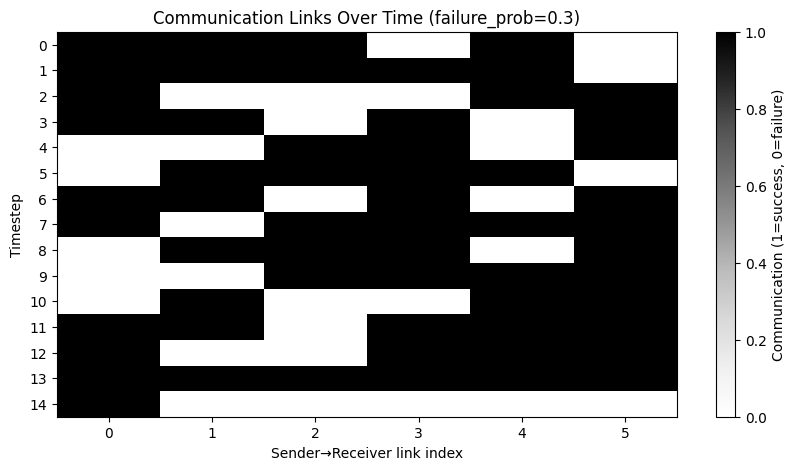

In [3]:
#-------  VISUALIZE  FAILURES --------
import matplotlib.pyplot as plt 

def visualize_link_failures_over_time(failure_prob=0.3, steps=10):
    env = simple_spread_v3.env(N=3, local_ratio=1.0)
    agent_ids = env.possible_agents
    model = ProbabilisticModel(agent_ids=agent_ids, failure_prob=failure_prob)
    wrapped_env = CommunicationWrapper(env, failure_models=[model])
    par_env = aec_to_parallel(wrapped_env)
    par_env.reset(seed=42)

    link_history = []

    for t in range(steps):
        actions = {agent: par_env.action_space(agent).sample() for agent in par_env.agents}
        _, _, _, _, _ = par_env.step(actions)

        matrix = wrapped_env.get_communication_state().astype(int)
        n = len(agent_ids)

        # Flatten upper triangle (excluding self-links)
        flattened_links = []
        for i in range(n):
            for j in range(n):
                if i != j:
                    flattened_links.append(matrix[i][j])
        link_history.append(flattened_links)

    link_history = np.array(link_history)
    
        # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(link_history, cmap="Greys", interpolation="nearest", aspect="auto")
    plt.colorbar(label="Communication (1=success, 0=failure)")
    plt.title(f"Communication Links Over Time (failure_prob={failure_prob})")
    plt.xlabel("Sender→Receiver link index")
    plt.ylabel("Timestep")
    plt.yticks(np.arange(steps))
    plt.show()

# Run the visualization
visualize_link_failures_over_time(failure_prob=0.3, steps=15)

In [ ]:
import numpy as np
from gymnasium import spaces
from mpe2 import simple_spread_v3
from failure_api.wrappers.communication_wrapper import CommunicationWrapper
from failure_api.communication_models.probabilistic_model import ProbabilisticModel
from pettingzoo.utils.conversions import aec_to_parallel
from failure_api.wrappers.noise_wrapper import NoiseWrapper
from failure_api.noise_models.gaussian_noise import GaussianNoiseModel

env = simple_spread_v3.env(N=3, local_ratio=0.5)
agent_ids = env.possible_agents
model = ProbabilisticModel(agent_ids=agent_ids, failure_prob=0.3)

wrapped_env = CommunicationWrapper(env, failure_models=[model])
ns_model = GaussianNoiseModel(mean=0.2, std=0.1)
final_env = NoiseWrapper(wrapped_env, noise_model=ns_model)
par_f_env = aec_to_parallel(final_env)
observations, infos = par_f_env.reset()

for t in range(10):
    print(f"\n--- Step {t+1} ---")
    
    actions = {agent: par_f_env.action_space(agent).sample() for agent in par_f_env.agents}
    par_f_env.step(actions)
    
    print(observations)

